In [1]:
import pandas as pd
vgame_df=pd.read_csv('vgames2.csv')
vgame_df=vgame_df.drop(['Unnamed: 0'],axis=1)
vgame_df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [2]:
print(vgame_df[vgame_df['Year'].isnull()].shape)
vgame_df[vgame_df['Year'].isnull()].head()
print(vgame_df[vgame_df['Genre'].isnull()].shape)
vgame_df[vgame_df['Genre'].isnull()].head()
print(vgame_df[vgame_df['Publisher'].isnull()].shape)
vgame_df[vgame_df['Publisher'].isnull()].head()

(271, 9)
(50, 9)
(58, 9)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
272,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
1313,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.17,0.06,0,0
1560,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004.0,Misc,NaN,0.12,0.04,0,0
1789,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.16,0.06,0,0
1879,Monster Hunter Frontier Online,PS3,NaN,Role-Playing,NaN,0,0,0.05,0


In [3]:
df=vgame_df.dropna(axis=0)
print(len(df),df.dtypes)
df=df.astype({'Year': 'int32'})
df.head()

16241 Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04


In [4]:
df2=pd.DataFrame(df)
for i in range(5,9):
  df2.iloc[:,i]=df.iloc[:,i].str.extract(r'[\d\.]+([K]+)', expand=False).fillna(1).replace(['K'],[0.1**3]).astype(float) * \
  df.iloc[:,i].replace(r'[KM]+$', '', regex=True).astype(float)

df2.loc[:,'NA_Sales':][5:20]
df2.shape

(16241, 9)

In [5]:
# Year 년도 모두 4자리로 바꾸기
df2.shape
df2.iloc[:,2].dtype
df2.shape
for i,j in enumerate(df2['Year']):
  if j < 50:
    df2.iloc[i,2]=2000+j
  elif j <100:
    df2.iloc[i,2]=1900+j
df2.shape

(16241, 9)

In [6]:
# 지역에 따라서 선호하는 게임 장르가 다를까?
# 연도별 게임의 트렌드가 있을까?
# 출고량이 높은 게임에 대한 분석 및 시각화 프로세스?

In [7]:
from scipy import stats

platform_na=df2.loc[:,'NA_Sales'].loc[df2['Genre'] == 'Platform']
shooter_na=df2.loc[:,'NA_Sales'].loc[df2['Genre'] == 'Shooter']

print(stats.ttest_1samp(platform_na, 0.51))
print(stats.ttest_1samp(shooter_na, 0.45))
print(stats.ttest_ind(platform_na,shooter_na,equal_var=False))

platform_eu=df2.loc[:,'EU_Sales'].loc[df2['Genre'] == 'Platform']
shooter_eu=df2.loc[:,'EU_Sales'].loc[df2['Genre'] == 'Shooter']

print(stats.ttest_1samp(platform_eu, 0.23))
print(stats.ttest_1samp(shooter_eu, 0.24))
print(stats.ttest_ind(platform_eu,shooter_eu,equal_var=False))

platform_jp=df2.loc[:,'JP_Sales'].loc[df2['Genre'] == 'Platform']
shooter_jp=df2.loc[:,'JP_Sales'].loc[df2['Genre'] == 'Role-Playing']

print(stats.ttest_1samp(platform_jp, 0.15))
print(stats.ttest_1samp(shooter_jp, 0.23))
print(stats.ttest_ind(shooter_jp,platform_jp,equal_var=False))

platform_other=df2.loc[:,'Other_Sales'].loc[df2['Genre'] == 'Shooter']
shooter_other=df2.loc[:,'Other_Sales'].loc[df2['Genre'] == 'Racing']

print(stats.ttest_1samp(platform_other, 0.08))
print(stats.ttest_1samp(shooter_other, 0.06))
print(stats.ttest_ind(shooter_other,platform_other,equal_var=False))

Ttest_1sampResult(statistic=0.0033570185975607104, pvalue=0.9973222595381013)
Ttest_1sampResult(statistic=-0.035034449224521466, pvalue=0.97205773795801)
Ttest_indResult(statistic=0.9995237598650618, pvalue=0.31769261013942357)
Ttest_1sampResult(statistic=-0.009141542744779234, pvalue=0.9927082966968959)
Ttest_1sampResult(statistic=0.15278727292026723, pvalue=0.878590134019843)
Ttest_indResult(statistic=-0.49532941609385017, pvalue=0.6204284292429268)
Ttest_1sampResult(statistic=-0.026877386353432606, pvalue=0.9785636796499547)
Ttest_1sampResult(statistic=0.24383490703703545, pvalue=0.8073928481739003)
Ttest_indResult(statistic=3.4504135650687076, pvalue=0.0005707608572027903)
Ttest_1sampResult(statistic=-0.07490731007606977, pvalue=0.9403001742331849)
Ttest_1sampResult(statistic=0.35185881720950124, pvalue=0.7250050094971707)
Ttest_indResult(statistic=-1.7392665643981404, pvalue=0.08212584380497365)


In [8]:
g_group=df2.loc[:,'NA_Sales':].groupby(df2['Genre'])
g_order=g_group.mean()
# g_order=g_order.reset_index()
A=g_order[['NA_Sales']].sort_values(by='NA_Sales',ascending=False).reset_index()
A=A.rename(columns={"Genre":"NA_G"})
A['EU_G']=g_order[['EU_Sales']].sort_values(by='EU_Sales',ascending=False).reset_index()['Genre']
A['EU_Sales']=g_order[['EU_Sales']].sort_values(by='EU_Sales',ascending=False).reset_index()['EU_Sales']
A['JP_G']=g_order[['JP_Sales']].sort_values(by='JP_Sales',ascending=False).reset_index()['Genre']
A['JP_Sales']=g_order[['JP_Sales']].sort_values(by='JP_Sales',ascending=False).reset_index()['JP_Sales']
A['Other_G']=g_order[['Other_Sales']].sort_values(by='Other_Sales',ascending=False).reset_index()['Genre']
A['Other_Sales']=g_order[['Other_Sales']].sort_values(by='Other_Sales',ascending=False).reset_index()['Other_Sales']

A

,NA_G,NA_Sales,EU_G,EU_Sales,JP_G,JP_Sales,Other_G,Other_Sales
0,Platform,0.510172,Shooter,0.242367,Role-Playing,0.234082,Shooter,0.079578
1,Shooter,0.448813,Platform,0.229817,Platform,0.149519,Racing,0.062765
2,Racing,0.290976,Racing,0.192797,Fighting,0.104359,Platform,0.058935
3,Sports,0.290239,Sports,0.161361,Puzzle,0.099364,Sports,0.057569
4,Action,0.265046,Action,0.158531,Simulation,0.075106,Action,0.056787
5,Fighting,0.263892,Simulation,0.133558,Strategy,0.073393,Fighting,0.043293
6,Misc,0.234819,Role-Playing,0.124976,Misc,0.061975,Misc,0.043212
7,Role-Playing,0.217584,Misc,0.123825,Sports,0.058617,Role-Playing,0.038724
8,Puzzle,0.214806,Fighting,0.119641,Action,0.048333,Simulation,0.037021
9,Simulation,0.214456,Puzzle,0.089170,Racing,0.046202,Puzzle,0.021979


In [9]:
A.columns = ['북미 장르순위', '북미 평균판매량','유럽 장르순위','유럽 평균판매량','일본 장르순위','일본 평균판매량','그외 장르순위','그외 평균판매량']
A

,북미 장르순위,북미 평균판매량,유럽 장르순위,유럽 평균판매량,일본 장르순위,일본 평균판매량,그외 장르순위,그외 평균판매량
0,Platform,0.510172,Shooter,0.242367,Role-Playing,0.234082,Shooter,0.079578
1,Shooter,0.448813,Platform,0.229817,Platform,0.149519,Racing,0.062765
2,Racing,0.290976,Racing,0.192797,Fighting,0.104359,Platform,0.058935
3,Sports,0.290239,Sports,0.161361,Puzzle,0.099364,Sports,0.057569
4,Action,0.265046,Action,0.158531,Simulation,0.075106,Action,0.056787
5,Fighting,0.263892,Simulation,0.133558,Strategy,0.073393,Fighting,0.043293
6,Misc,0.234819,Role-Playing,0.124976,Misc,0.061975,Misc,0.043212
7,Role-Playing,0.217584,Misc,0.123825,Sports,0.058617,Role-Playing,0.038724
8,Puzzle,0.214806,Fighting,0.119641,Action,0.048333,Simulation,0.037021
9,Simulation,0.214456,Puzzle,0.089170,Racing,0.046202,Puzzle,0.021979


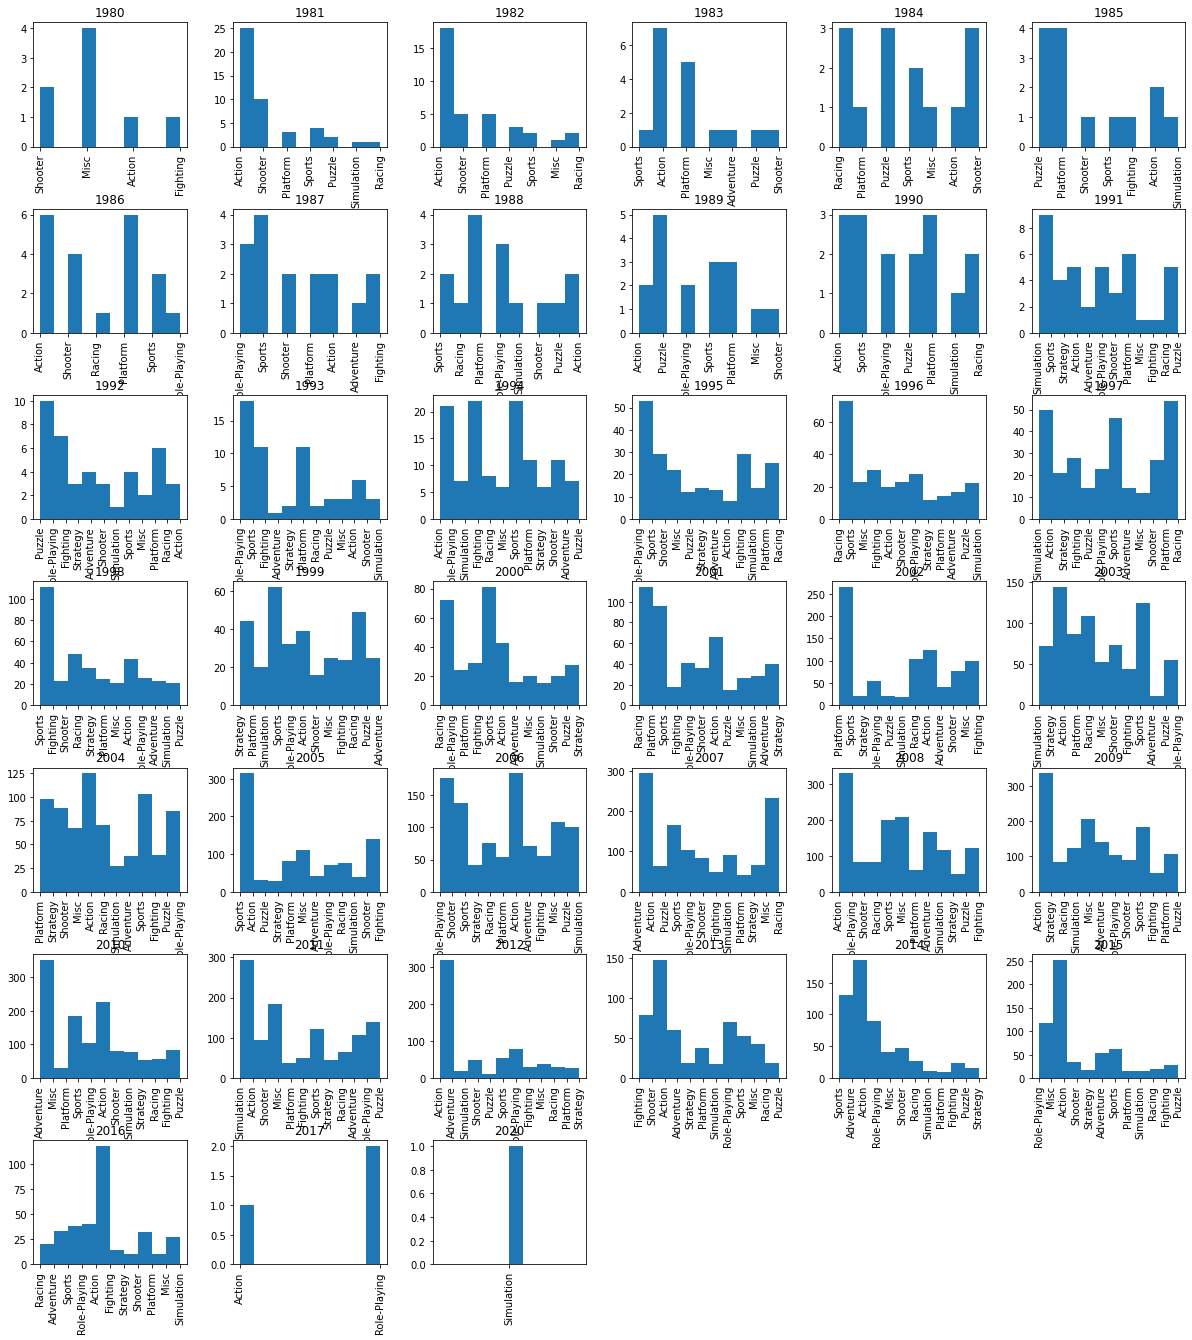

In [10]:
hist_G_Y=df2['Genre'].hist(by=df2['Year'],figsize=(20,23))

In [11]:
# count_g_byY=df2['Genre'].groupby(df2['Year']).value_counts()
count_norm=df2['Genre'].groupby(df2['Year']).value_counts()
# count_norm=df2['Genre'].groupby(df2['Year']).value_counts(normalize=True)
# df3=df3.rename({'Genre':'count'}).reset_index()
count_norm

Year  Genre       
1980  Misc             4
      Shooter          2
      Action           1
      Fighting         1
1981  Action          25
                      ..
2016  Strategy        10
      Simulation       9
2017  Role-Playing     2
      Action           1
2020  Simulation       1
Name: Genre, Length: 388, dtype: int64

In [12]:
df4 = count_norm.rename_axis(['Year','Genre']).to_frame('Genre')

df4=df4.rename(columns={'Genre':'count'})
df4=df4.reset_index()

In [13]:
# for i in range(2):
for i in range(len(df4)):
  yr=df4.iloc[i,0]
  gr=df4.iloc[i,1]
  cnt=df4.iloc[i,2]
  
  # 

In [14]:
# df4['Year'].unique().shape
# df4['Genre'].unique()
len(df4)

388

In [15]:
# 인기 장르 5개만 우선 고른다.

import numpy as np

cnt_df=pd.DataFrame(np.zeros([39,5],dtype=int))
cnt_df.columns=['Action','Sports','Shooter','Role-Playing','Platform']
# cnt_df.columns = df4['Genre'].unique()
cnt_df.index= df4['Year'].unique()

# cnt_df
for i in range(len(df4)):
  yr=df4.iloc[i,0]
  gr=df4.iloc[i,1]
  cnt=df4.iloc[i,2]
  if gr in ['Action','Sports','Shooter','Role-Playing','Platform']:
    cnt_df.loc[yr,gr]=cnt
# cnt_df/cnt_df.sum(axis=1)
cnt_df=cnt_df[:-2]
cnt_df=cnt_df.div(cnt_df.sum(axis=1), axis=0)

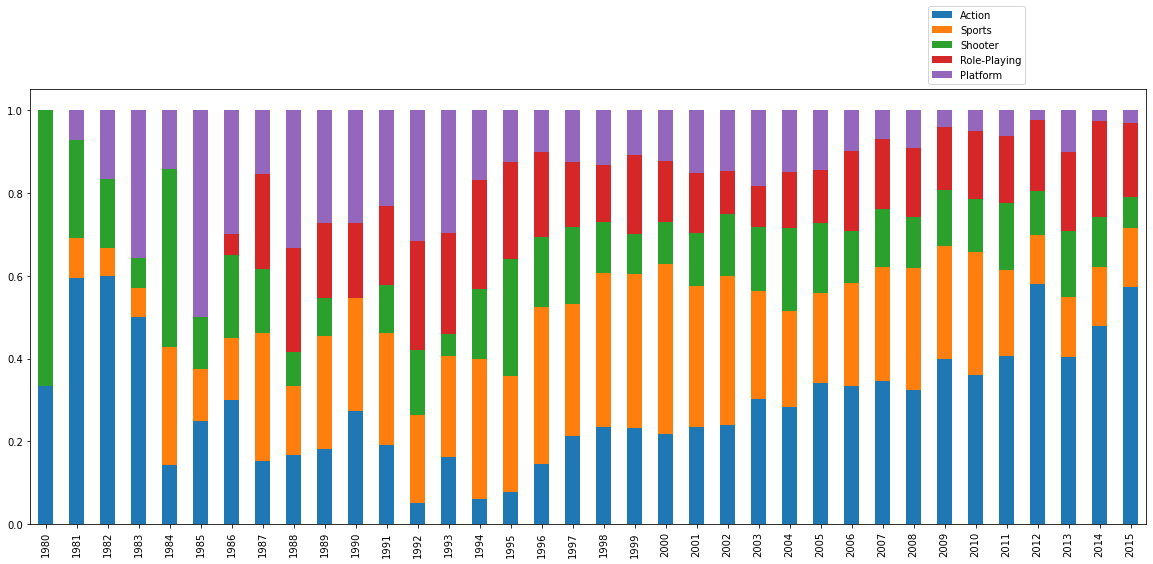

In [16]:
import matplotlib.pyplot as plt
cnt_df.iloc[:-1,:5].plot(kind="bar",stacked=True,figsize=(20,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()

<ipython-input-18-fe552767e464>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(cnt_df.corr(), dtype=np.bool)


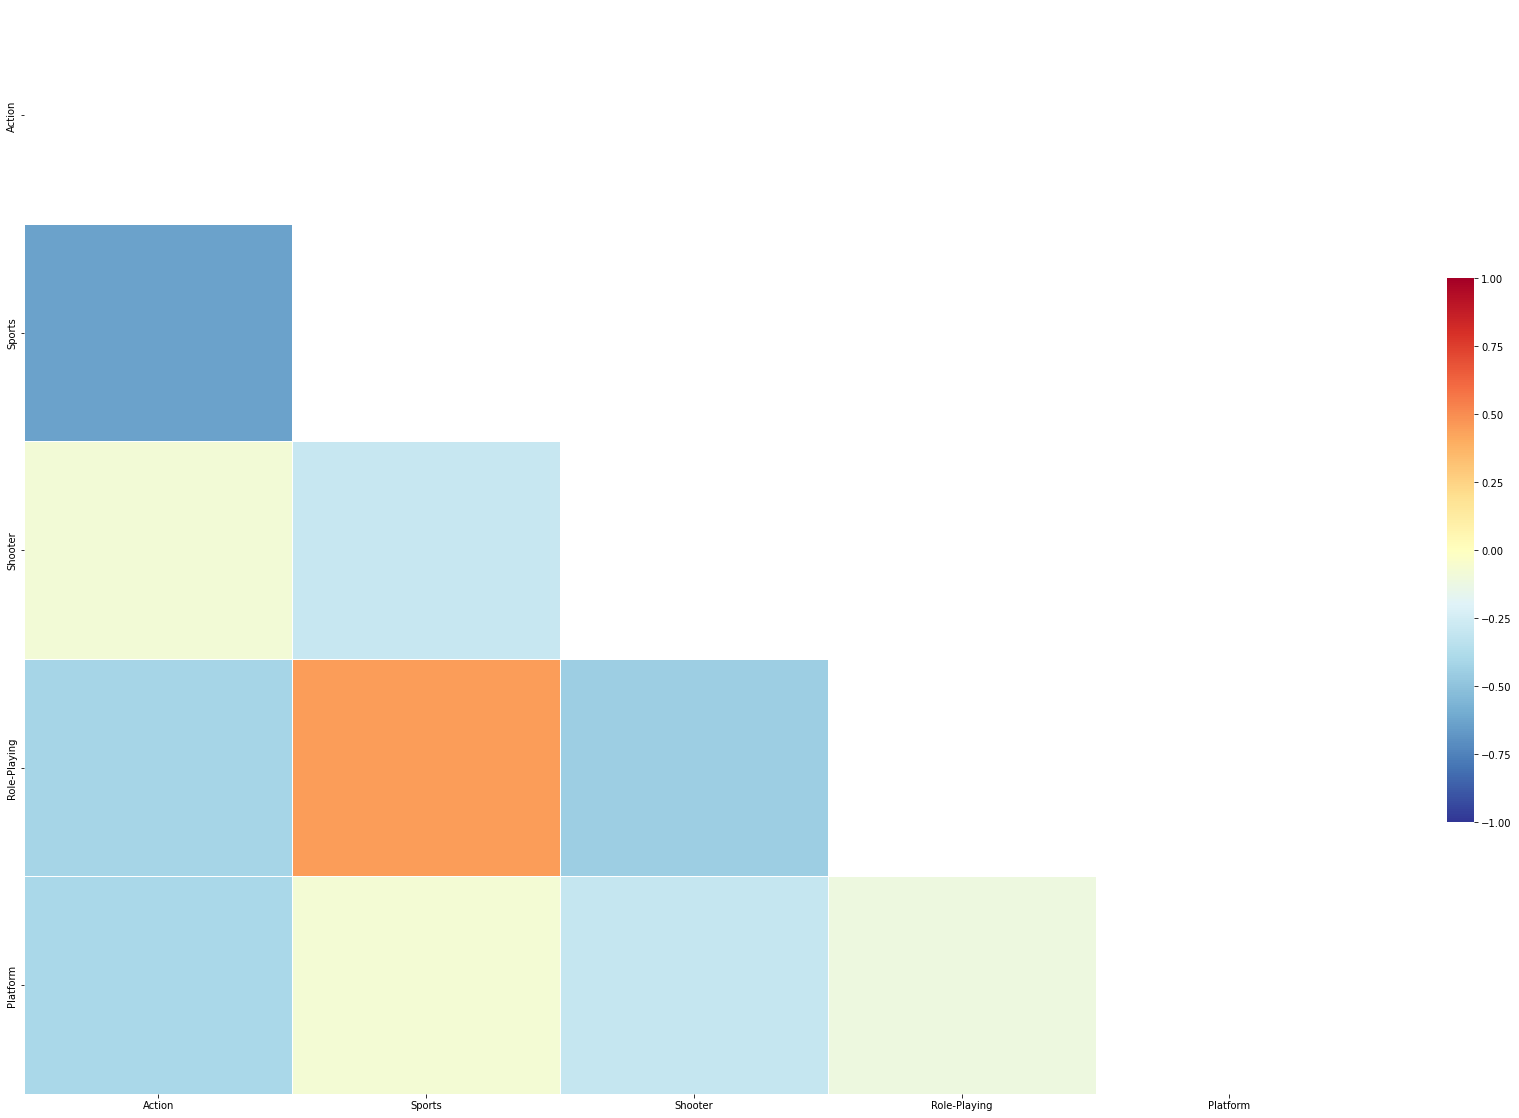

<Figure size 432x288 with 0 Axes>

In [18]:
import seaborn as sns
cnt_df=cnt_df.T

# corrplot(cnt_df.corr(), 
fig, ax = plt.subplots( figsize=(30,20) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(cnt_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다

sns.heatmap(cnt_df.corr(), 
            cmap = 'RdYlBu_r', 
            annot = False,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": 0.5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()
plt.savefig('fig1.png', dpi=300)

In [19]:
cnt_df.head()

,Action,Sports,Shooter,Role-Playing,Platform
1980,0.333333,0.000000,0.666667,0.0,0.000000
1981,0.595238,0.095238,0.238095,0.0,0.071429
1982,0.600000,0.066667,0.166667,0.0,0.166667
1983,0.500000,0.071429,0.071429,0.0,0.357143
1984,0.142857,0.285714,0.428571,0.0,0.142857


In [20]:
import numpy as np

cnt_df=pd.DataFrame(np.zeros([39,12],dtype=int))
cnt_df.columns = df4['Genre'].unique()
cnt_df.index= df4['Year'].unique()

for i in range(len(df4)):
  yr=df4.iloc[i,0]
  gr=df4.iloc[i,1]
  cnt=df4.iloc[i,2]
  cnt_df.loc[yr,gr]=cnt
cnt_df

,Misc,Shooter,Action,Fighting,Sports,Platform,Puzzle,Racing,Simulation,Adventure,Role-Playing,Strategy
1980,4,2,1,1,0,0,0,0,0,0,0,0
1981,0,10,25,0,4,3,2,1,1,0,0,0
1982,1,5,18,0,2,5,3,2,0,0,0,0
1983,1,1,7,0,1,5,1,0,0,1,0,0
1984,1,3,1,0,2,1,3,3,0,0,0,0
1985,0,1,2,1,1,4,4,0,1,0,0,0
1986,0,4,6,0,3,6,0,1,0,0,1,0
1987,0,2,2,2,4,2,0,0,0,1,3,0
1988,0,1,2,0,2,4,1,1,1,0,3,0
1989,1,1,2,0,3,3,5,0,0,0,2,0


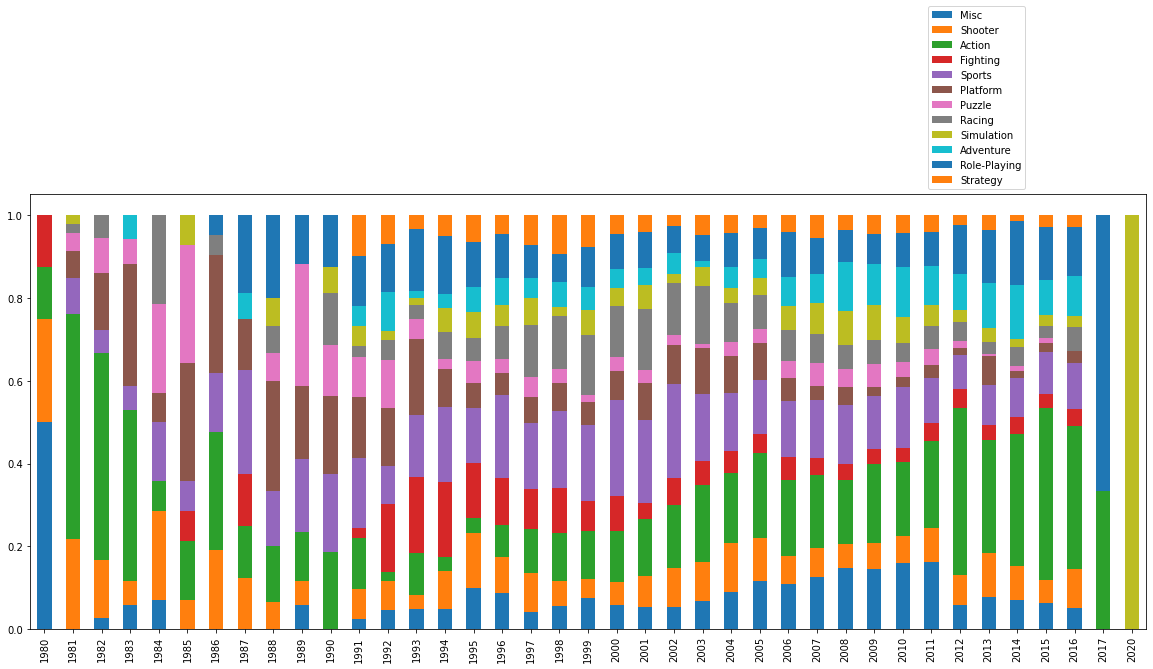

In [29]:
import matplotlib.pyplot as plt
cnt_df.plot(kind="bar",stacked=True,figsize=(20,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()

In [30]:
# Sports가 1996~2002년까지 Action보다 더 많은 비율을 차지했음
# Racing이랑 Sports가 비슷한 양상을 보임. 늘고 주는 비슷한 양상을 가짐
# 하지만, 그 외적으로는 Action이 비율을 제일 많이 차지함
# Role-playing은 2000년도부터 서서히 2011년도까지 서서히 올라감
# Platform은 계속 줄음
# Puzzle은 전반적으로 줄음
# Fighting은 1992년도에 갑자기 나와서 상당한 비율을 차지하지만, 그 이후로는 꾸준히 줄어듬

# 확실한거 아님. 색에 따라 뭔지 제대로 구별해야함

In [21]:
df2.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [22]:
################################################################################
################## 3번 문제 ####################################################
# 출고량이 높은 게임에 대한 분석 및 시각화

sum_sales=pd.DataFrame({"sum":df2.loc[:,'NA_Sales':].sum(axis=1)})
# df5=pd.concat([df2,df2.loc[:,'NA_Sales':].sum(axis=1)])
df5=df2.join(sum_sales, how='outer')

df5.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [126]:
df5.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [23]:
import gensim
word2vec_model=gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz',binary=True)

In [62]:
df5.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [56]:
df5.loc[df['NA_Sales']>0]['Name'].iloc[2]

'Deal or No Deal: Special Edition'

In [61]:
# for j in df5.loc[df['NA_Sales']>0]['Name'][0].lower().split(" "):
#     print(word2vec_model[j])

# # df5.loc[df['NA_Sales']>0]

vocab = " abcdefghijklmnopqrstuvwxyz'"

import re
import unicodedata
sequences=df5.loc[df['NA_Sales']>0]['Name'].iloc[2]
sequences = ''.join(char for char in unicodedata.normalize('NFD', sequences)
				   if unicodedata.category(char) != 'Mn')
sequences=sequences.lower()
sequences = re.sub("[^{}]".format(vocab), " ", sequences)
sequences = re.sub("[ ]+", " ", sequences)
word_list=list(set(sequences.split(" ")))
print(word_list)

def get_vector(word):
    if word in word2vec_model:
        return word2vec_model[word]
    else:
        return None

word_list2=np.zeros([4,300])

i=0
for j in word_list:
    if i==4: break
    a=get_vector(j)
#     print(a.shape,j)
    try:
        if a.shape[0] == 300:
            word_list2[i]=a
            i+=1
    except:
        pass
        
word_list2.shape

['edition', 'or', 'no', 'deal', 'special']


(4, 300)

In [ ]:
# PCA그리기

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X=df5.loc[:,'NA_Sales':'Other_Sales'].loc[df['Genre'].isin(['Platform','Puzzle','Racing','Role-Playing'])]
y=df5.loc[:,'Genre'].loc[df['Genre'].isin(['Platform','Puzzle','Racing','Role-Playing'])]

# X=df5.loc[:,'NA_Sales':'Other_Sales'].loc[df['Genre'].isin(['Racing','Role-Playing'])]
# y=df5.loc[:,'Genre'].loc[df['Genre'].isin(['Racing','Role-Playing'])]
# y=df5.loc[:,'Genre']



scaler = StandardScaler()
scaler.fit(X) 
X_scaled = scaler.transform(X)

pca = PCA(n_components=3)
pca.fit(X_scaled) 
X_pca = pca.transform(X_scaled) 

ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cdict = {'Platform':'green','Puzzle':'yellow','Racing':'blue','Role-Playing':'orange'}
labl = {'Platform':'Platform','Puzzle':'Puzzle','Racing':'Racing','Role-Playing':'Role-Playing'}
marker = {'Platform':'o','Puzzle':'o','Racing':'o','Role-Playing':'o'}
alpha = {'Platform':.5,'Puzzle':0.5,'Racing':0.3,'Role-Playing':0.5}

fig = plt.figure(figsize=(30,20))
# ax = fig.add_subplot(111,)
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
# fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix],Zax[ix], c=cdict[l], s=40,
           label=labl[l], marker=marker[l], alpha=alpha[l])
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
# ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

# https://stackoverflow.com/questions/65241847/how-to-plot-3d-pca-with-different-colors

In [129]:
sales=df5.loc[df5['NA_Sales']>0]['NA_Sales']
names=df5.loc[df5['NA_Sales']>0]['Name']
year=df5.loc[df5['NA_Sales']>0]['Year']
genre=names=df5.loc[df5['NA_Sales']>0]['Genre']
publisher=names=df5.loc[df5['NA_Sales']>0]['Publisher']



,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...
16591,Madden NFL 2005,PS2,2004,Sports,Electronic Arts,4.18,0.26,0.01,0.08,4.53
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79


[0.73545961 0.16913907 0.09540132]


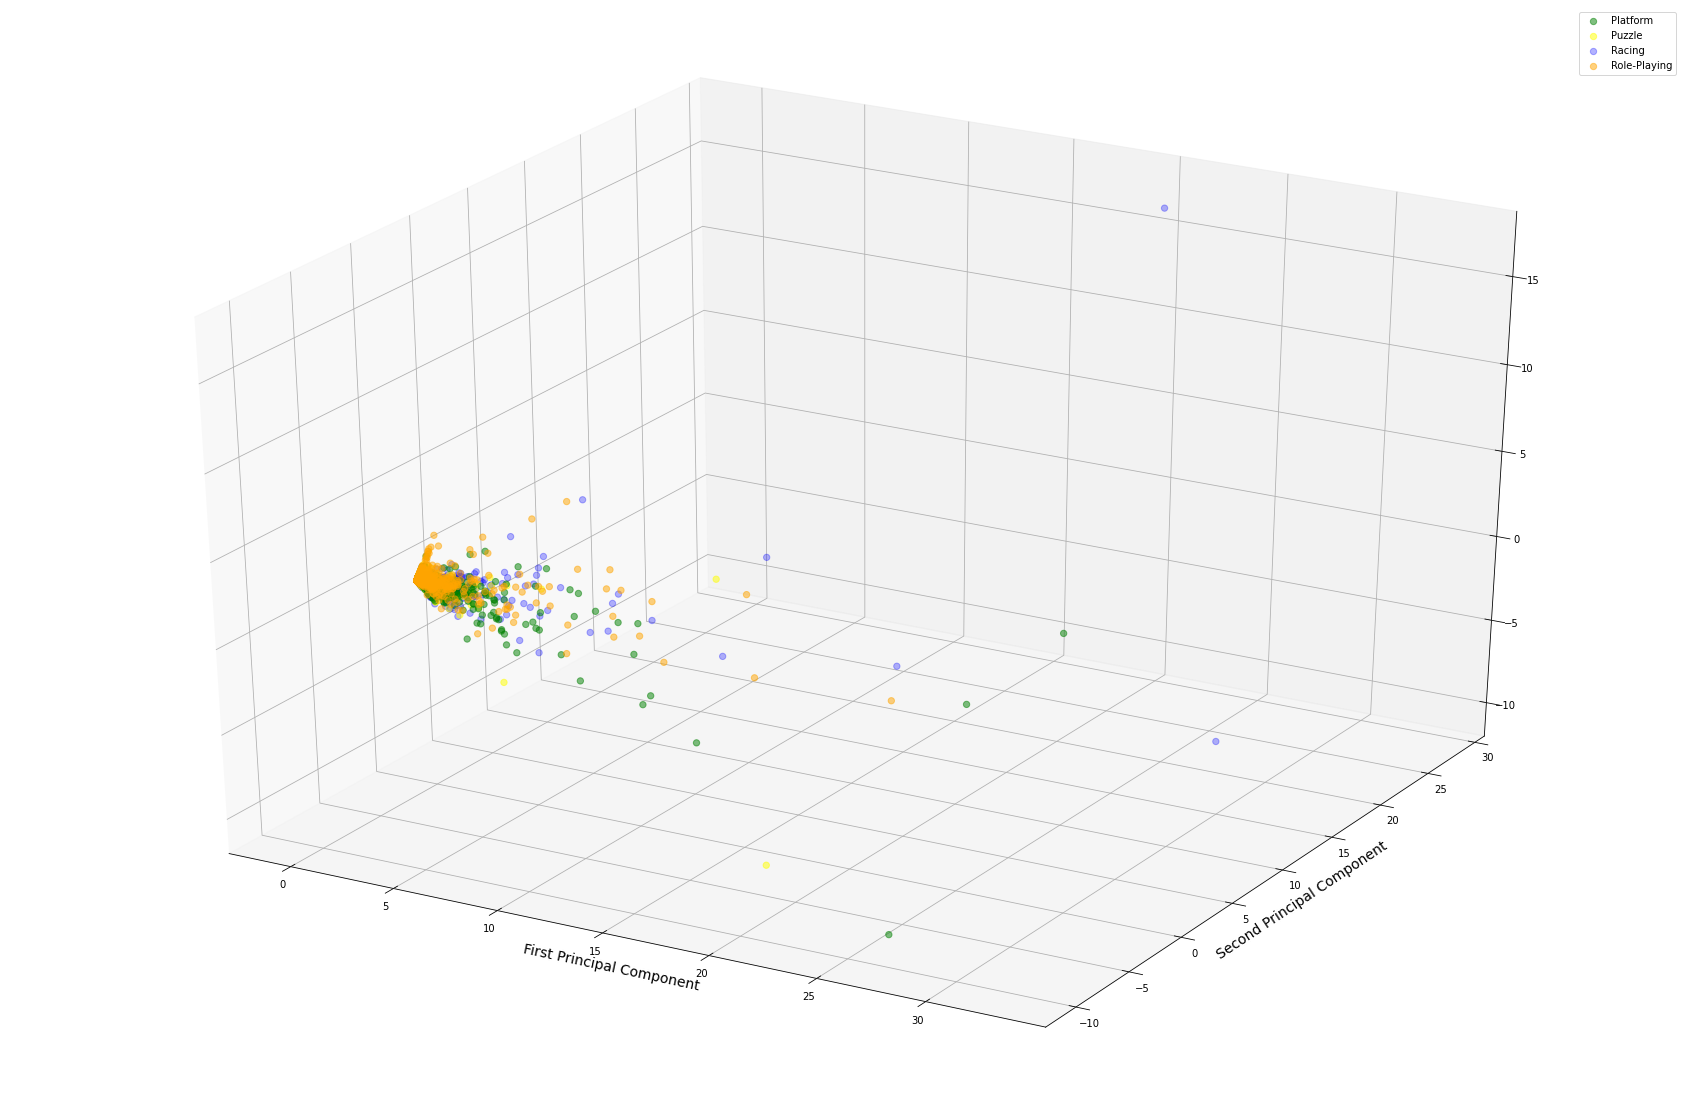

In [125]:
# PCA그리기

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X=df5.loc[:,'NA_Sales':'Other_Sales'].loc[df['Genre'].isin(['Platform','Puzzle','Racing','Role-Playing'])]
y=df5.loc[:,'Genre'].loc[df['Genre'].isin(['Platform','Puzzle','Racing','Role-Playing'])]

# X=df5.loc[:,'NA_Sales':'Other_Sales'].loc[df['Genre'].isin(['Racing','Role-Playing'])]
# y=df5.loc[:,'Genre'].loc[df['Genre'].isin(['Racing','Role-Playing'])]
# y=df5.loc[:,'Genre']

scaler = StandardScaler()
scaler.fit(X) 
X_scaled = scaler.transform(X)

pca = PCA(n_components=3)
pca.fit(X_scaled) 
X_pca = pca.transform(X_scaled) 

ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cdict = {'Platform':'green','Puzzle':'yellow','Racing':'blue','Role-Playing':'orange'}
labl = {'Platform':'Platform','Puzzle':'Puzzle','Racing':'Racing','Role-Playing':'Role-Playing'}
marker = {'Platform':'o','Puzzle':'o','Racing':'o','Role-Playing':'o'}
alpha = {'Platform':.5,'Puzzle':0.5,'Racing':0.3,'Role-Playing':0.5}

# cdict = {'Action':'red','Sports':'green','Strategy':'yellow','Adventure':'blue','Puzzle':'orange'}
# labl = {'Action':'Action','Sports':'Sports','Strategy':'Strategy','Adventure':'Adventure','Puzzle':'Puzzle'}
# marker = {'Action':'*','Sports':'o','Strategy':'o','Adventure':'o','Puzzle':'o'}
# alpha = {'Action':.3, 'Sports':.5,'Strategy':0.5,'Adventure':0.3,'Puzzle':0.5}

# cdict = {'Role-Playing':'red','Racing':'green'}
# labl = {'Role-Playing':'Role-Playing','Racing':'Racing'}
# marker = {'Role-Playing':'*','Racing':'o'}
# alpha = {'Role-Playing':.3, 'Racing':.5}

fig = plt.figure(figsize=(30,20))
# ax = fig.add_subplot(111,)
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
# fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix],Zax[ix], c=cdict[l], s=40,
           label=labl[l], marker=marker[l], alpha=alpha[l])
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
# ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

# https://stackoverflow.com/questions/65241847/how-to-plot-3d-pca-with-different-colors

In [66]:
df_another=df5.loc[df['NA_Sales']>0].sort_values(by='NA_Sales',ascending=False)
df_another.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
10488,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
1203,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83


In [68]:
for j in df_another['Name'].iloc[:5]:
    print(j)

Wii Sports
Super Mario Bros.
Duck Hunt
Tetris
Mario Kart Wii


In [80]:
df_another=df5.loc[df['NA_Sales']>0].sort_values(by='NA_Sales',ascending=False)
df_another.head()

print(df_another['sum'].shape)
print(df_another['Name'].shape) # (11820,)

import re
import unicodedata

def get_vector(word):
    if word in word2vec_model:
        return word2vec_model[word]
    else:
        return None

word_list2=np.zeros([11820,4,300])
vocab = " abcdefghijklmnopqrstuvwxyz'"

for k in range(len(df_another)):
    sequences=df_another['Name'].iloc[k]
    sequences = ''.join(char for char in unicodedata.normalize('NFD', sequences)
                       if unicodedata.category(char) != 'Mn')
    sequences=sequences.lower()
    sequences = re.sub("[^{}]".format(vocab), " ", sequences)
    sequences = re.sub("[ ]+", " ", sequences)
    word_list=list(set(sequences.split(" ")))
    
    i=0
    for j in word_list:
        if i==4: break
        a=get_vector(j)
    #     print(a.shape,j)
        try:
            if a.shape[0] == 300:
                word_list2[k]=a
                i+=1
        except:
            pass
        
bases=1
print(word_list2[-bases,:,:],df_another['Name'].iloc[11820-bases-1])
print(word_list2.shape)

(11820,)
(11820,)
[[-0.07568359  0.20703125  0.19921875 ... -0.38671875  0.25585938
   0.00576782]
 [-0.07568359  0.20703125  0.19921875 ... -0.38671875  0.25585938
   0.00576782]
 [-0.07568359  0.20703125  0.19921875 ... -0.38671875  0.25585938
   0.00576782]
 [-0.07568359  0.20703125  0.19921875 ... -0.38671875  0.25585938
   0.00576782]] Alfa Romeo Racing Italiano
(11820, 4, 300)


In [84]:
df_another.head()
# df_another['sum']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
10488,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
1203,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83


In [103]:
word_list2=np.concatenate([word_list2[:200],word_list2[-200:]])

(400, 1200) (400,)
[0.46921839 0.28919295 0.24158867]


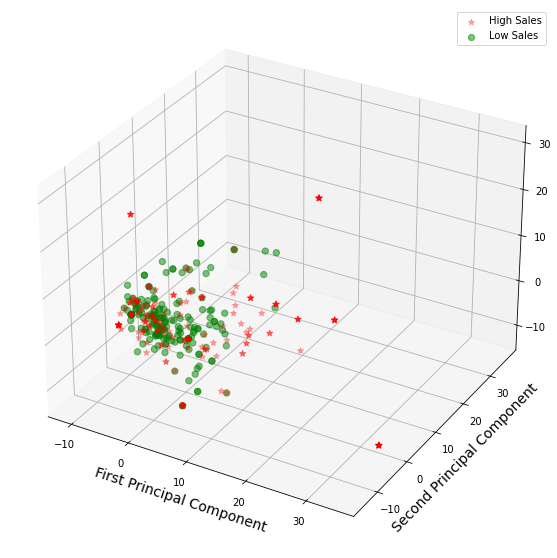

In [107]:
# PCA PCA !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# PCA그리기

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X=np.reshape(word_list2,[400,-1])
y=np.concatenate([np.zeros(200,dtype=int),np.ones(200,dtype=int)])

print(X.shape, y.shape)

scaler = StandardScaler()
scaler.fit(X) 
X_scaled = scaler.transform(X)

pca = PCA(n_components=3)
pca.fit(X_scaled) 
X_pca = pca.transform(X_scaled) 

ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

# print(Xax.shape,Yax.shape,Zax.shape)

# cdict = {'Platform':'green','Puzzle':'yellow','Racing':'blue','Role-Playing':'orange'}
# labl = {'Platform':'Platform','Puzzle':'Puzzle','Racing':'Racing','Role-Playing':'Role-Playing'}
# marker = {'Platform':'o','Puzzle':'o','Racing':'o','Role-Playing':'o'}
# alpha = {'Platform':.5,'Puzzle':0.5,'Racing':0.3,'Role-Playing':0.5}

# cdict = {'Action':'red','Sports':'green','Strategy':'yellow','Adventure':'blue','Puzzle':'orange'}
# labl = {'Action':'Action','Sports':'Sports','Strategy':'Strategy','Adventure':'Adventure','Puzzle':'Puzzle'}
# marker = {'Action':'*','Sports':'o','Strategy':'o','Adventure':'o','Puzzle':'o'}
# alpha = {'Action':.3, 'Sports':.5,'Strategy':0.5,'Adventure':0.3,'Puzzle':0.5}

cdict = {0:'red',1:'green'}
labl = {0:'High Sales',1:'Low Sales'}
marker = {0:'*',1:'o'}
alpha = {0:.3, 1:.5}

fig = plt.figure(figsize=(15,10))
# ax = fig.add_subplot(111,)
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
# fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix],Zax[ix], c=cdict[l], s=40,
           label=labl[l], marker=marker[l], alpha=alpha[l])
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
# ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

# https://stackoverflow.com/questions/65241847/how-to-plot-3d-pca-with-different-colors

In [109]:
df6=df5.drop(df5.loc[:,'NA_Sales':'Other_Sales'],axis=1).sort_values(by='sum',ascending=False)
df6.head()

,Name,Platform,Year,Genre,Publisher,sum
2908,Wii Sports,Wii,2006,Sports,Nintendo,82.74
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,40.24
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,35.83
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,33.00
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,31.38


In [110]:
print(df6['Publisher'].unique().shape,
      df6['Platform'].unique().shape,
      df6['Name'].unique().shape,
      len(df6))

(575,) (31,) (11295,) 16241


In [111]:
i=0
df7=df6.iloc[800*i:800*(i+1),3].value_counts(normalize=True)
df7=df7.rename_axis(['Genre']).to_frame('count').reset_index()
for i in range(1,21):
  temp=df6.iloc[800*i:800*(i+1),3].value_counts(normalize=True)
  temp=temp.rename_axis(['Genre']).to_frame('count').reset_index()
  df7=pd.concat([df7,temp], axis=1)

In [112]:
df7

,Genre,count,Genre,count,Genre,count,Genre,count,Genre,count,...,Genre,count,Genre,count,Genre,count,Genre,count,Genre,count
0,Action,0.21000,Action,0.20000,Action,0.19750,Action,0.21250,Action,0.21625,...,Action,0.17875,Action,0.18125,Adventure,0.20125,Adventure,0.21375,Action,0.211618
1,Sports,0.13750,Sports,0.14875,Sports,0.18500,Sports,0.15875,Sports,0.19125,...,Sports,0.13000,Adventure,0.15500,Action,0.19000,Action,0.15625,Adventure,0.182573
2,Shooter,0.13250,Shooter,0.11875,Shooter,0.10500,Shooter,0.10375,Misc,0.10125,...,Adventure,0.11500,Misc,0.12875,Misc,0.10000,Misc,0.09000,Misc,0.095436
3,Role-Playing,0.10750,Role-Playing,0.10375,Racing,0.10000,Role-Playing,0.10125,Shooter,0.09125,...,Misc,0.09500,Role-Playing,0.09125,Role-Playing,0.09500,Sports,0.08500,Puzzle,0.078838
4,Platform,0.10500,Racing,0.08750,Role-Playing,0.08250,Misc,0.08500,Role-Playing,0.09000,...,Role-Playing,0.07375,Sports,0.08500,Sports,0.07875,Racing,0.07250,Sports,0.078838
5,Misc,0.08375,Platform,0.08625,Misc,0.08000,Racing,0.07750,Racing,0.06750,...,Racing,0.07375,Strategy,0.06875,Simulation,0.07250,Strategy,0.07125,Strategy,0.074689
6,Racing,0.07625,Misc,0.08125,Platform,0.07875,Fighting,0.06625,Platform,0.05875,...,Shooter,0.06750,Racing,0.06375,Shooter,0.07000,Shooter,0.06750,Role-Playing,0.074689
7,Fighting,0.05125,Fighting,0.06750,Fighting,0.05750,Platform,0.06250,Simulation,0.04875,...,Strategy,0.05875,Shooter,0.05625,Strategy,0.05375,Simulation,0.06000,Racing,0.062241
8,Simulation,0.04125,Simulation,0.04250,Simulation,0.05125,Simulation,0.04750,Fighting,0.04875,...,Simulation,0.05750,Simulation,0.05375,Racing,0.05250,Role-Playing,0.05750,Shooter,0.058091
9,Puzzle,0.02375,Puzzle,0.02750,Puzzle,0.02375,Adventure,0.03250,Strategy,0.03125,...,Puzzle,0.05625,Puzzle,0.04250,Puzzle,0.04125,Puzzle,0.05250,Simulation,0.033195


In [113]:

cnt_df7=pd.DataFrame(np.zeros([21,12],dtype=int))
cnt_df7.columns = df4['Genre'].unique()
cnt_df7.index= [i for i in range(21)]

for i in range(21):
  gr=df7.iloc[:,2*i]
  gr_cnt=df7.iloc[:,2*i+1]
  for g,c in zip(gr,gr_cnt):
    cnt_df7.loc[i,g]=c
cnt_df7

,Misc,Shooter,Action,Fighting,Sports,Platform,Puzzle,Racing,Simulation,Adventure,Role-Playing,Strategy
0,0.083750,0.132500,0.210000,0.051250,0.137500,0.105000,0.023750,0.076250,0.041250,0.016250,0.107500,0.015000
1,0.081250,0.118750,0.200000,0.067500,0.148750,0.086250,0.027500,0.087500,0.042500,0.021250,0.103750,0.015000
2,0.080000,0.105000,0.197500,0.057500,0.185000,0.078750,0.023750,0.100000,0.051250,0.021250,0.082500,0.017500
3,0.085000,0.103750,0.212500,0.066250,0.158750,0.062500,0.022500,0.077500,0.047500,0.032500,0.101250,0.030000
4,0.101250,0.091250,0.216250,0.048750,0.191250,0.058750,0.025000,0.067500,0.048750,0.030000,0.090000,0.031250
5,0.106250,0.088750,0.237500,0.046250,0.155000,0.057500,0.027500,0.080000,0.065000,0.038750,0.072500,0.025000
6,0.101250,0.070000,0.230000,0.078750,0.167500,0.056250,0.020000,0.067500,0.055000,0.038750,0.072500,0.042500
7,0.107500,0.053750,0.203750,0.050000,0.166250,0.057500,0.031250,0.080000,0.066250,0.042500,0.100000,0.041250
8,0.118750,0.062500,0.217500,0.048750,0.162500,0.043750,0.025000,0.083750,0.046250,0.058750,0.103750,0.028750
9,0.121250,0.075000,0.203750,0.048750,0.170000,0.038750,0.022500,0.071250,0.047500,0.062500,0.095000,0.043750


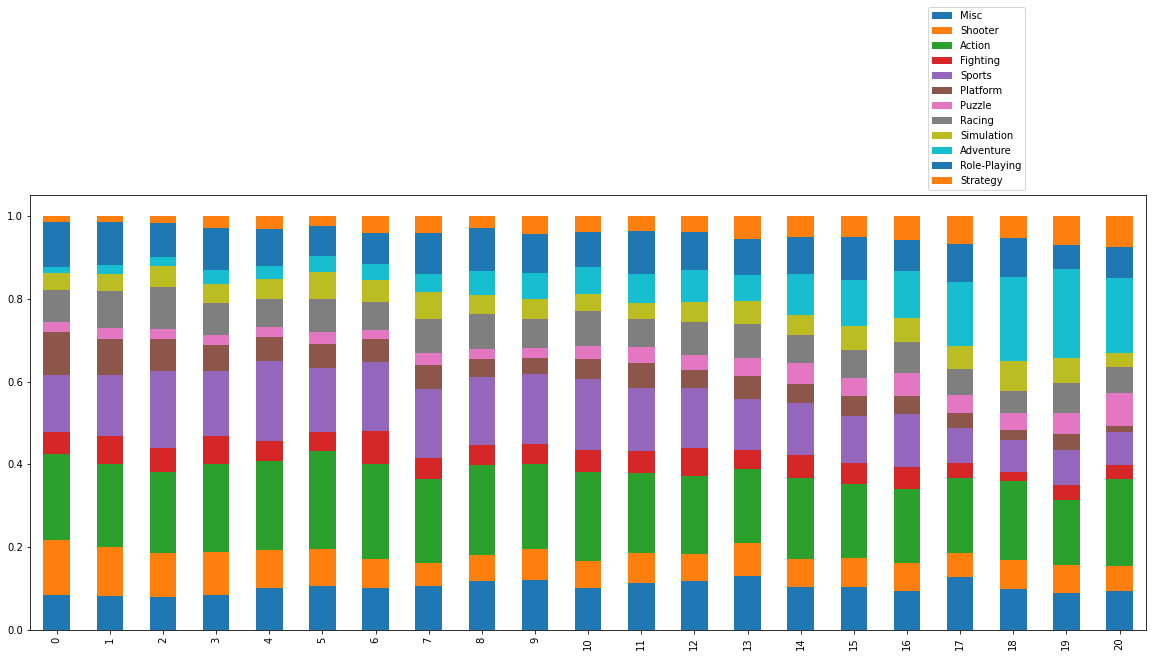

In [114]:
import matplotlib.pyplot as plt
cnt_df7.plot(kind="bar",stacked=True,figsize=(20,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()

<ipython-input-115-43ded4c88e0b>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(cnt_df7.corr(), dtype=np.bool)


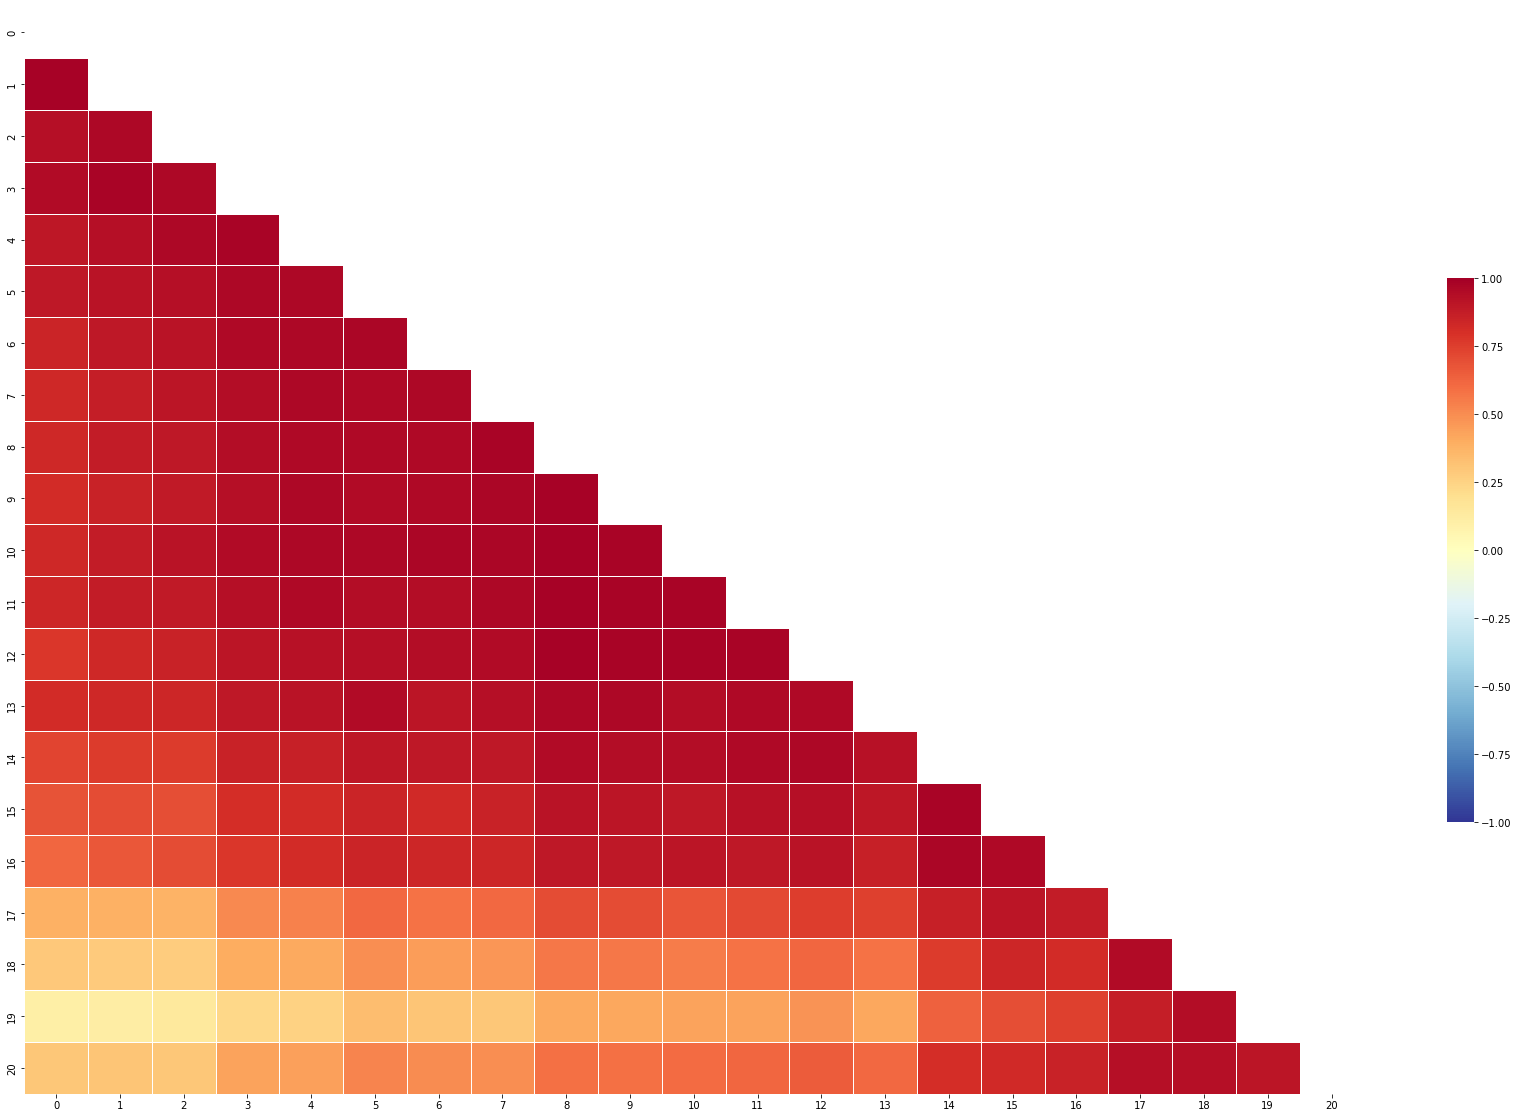

In [115]:
# Correlation보기

# corrplot(cnt_df7.corr(), 

cnt_df7=cnt_df7.T
fig, ax = plt.subplots( figsize=(30,20) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(cnt_df7.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다

sns.heatmap(cnt_df7.corr(), 
            cmap = 'RdYlBu_r', 
            annot = False,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": 0.5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()
# plt.savefig('fig1.png', dpi=300)

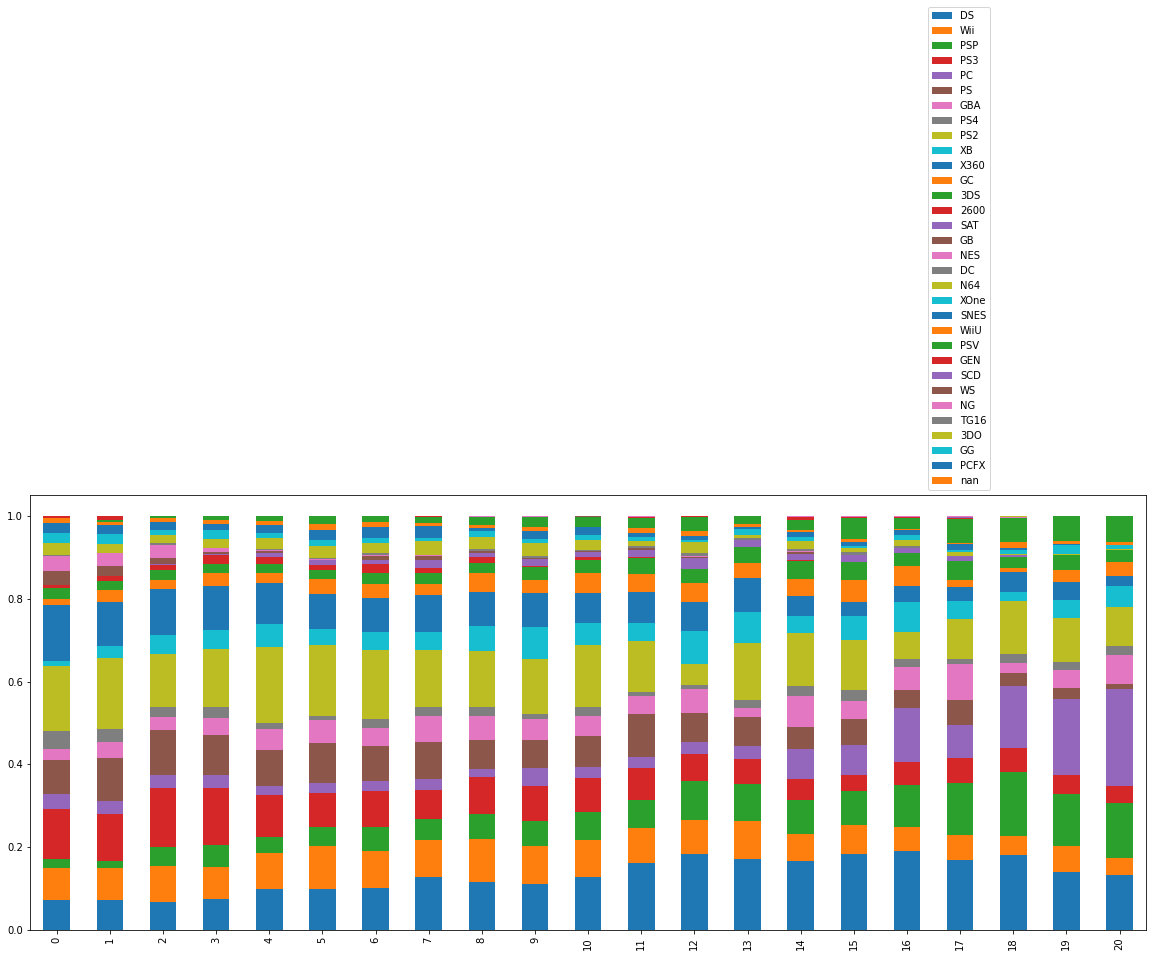

In [116]:
i=0
df7_platform=df6.iloc[800*i:800*(i+1),1].value_counts(normalize=True)
df7_platform=df7_platform.rename_axis(['Platform']).to_frame('count').reset_index()
for i in range(1,21):
  temp=df6.iloc[800*i:800*(i+1),1].value_counts(normalize=True)
  temp=temp.rename_axis(['Platform']).to_frame('count').reset_index()
  df7_platform=pd.concat([df7_platform,temp], axis=1)
# df7_platform

# df7_platform=df7_platform[:31]
cnt_df7_platform=pd.DataFrame(np.zeros([21,31],dtype=int))
cnt_df7_platform.columns = df2['Platform'].unique()
cnt_df7_platform.index= [i for i in range(21)]

for i in range(21):
  gr=df7_platform.iloc[:,2*i]
  gr_cnt=df7_platform.iloc[:,2*i+1]
  for g,c in zip(gr,gr_cnt):
    cnt_df7_platform.loc[i,g]=c

cnt_df7_platform.plot(kind="bar",stacked=True,figsize=(20,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()


In [40]:
cnt_df7_platform

,DS,Wii,PSP,PS3,PC,PS,GBA,PS4,PS2,XB,X360,GC,3DS,2600,SAT,GB,NES,DC,N64,XOne,SNES,WiiU,PSV,GEN,SCD,WS,NG,TG16,3DO,GG,PCFX,NaN
0,0.07250,0.076250,0.02375,0.120000,0.036250,0.082500,0.025000,0.045000,0.156250,0.011250,0.136250,0.015000,0.026250,0.00750,0.00000,0.03250,0.03750,0.00125,0.030000,0.023750,0.02500,0.010000,0.001250,0.00500,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN
1,0.07250,0.076250,0.01875,0.112500,0.032500,0.102500,0.040000,0.031250,0.170000,0.030000,0.105000,0.030000,0.021250,0.01125,0.00125,0.02375,0.03125,0.00125,0.021250,0.023750,0.02125,0.007500,0.006250,0.00750,0.00125,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN
2,0.06750,0.087500,0.04625,0.142500,0.030000,0.110000,0.031250,0.023750,0.128750,0.045000,0.111250,0.022500,0.022500,0.01375,0.00250,0.01250,0.03125,0.00500,0.020000,0.011250,0.02000,0.010000,0.003750,0.00125,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN
3,0.07500,0.076250,0.05500,0.137500,0.031250,0.095000,0.041250,0.026250,0.140000,0.047500,0.106250,0.030000,0.023750,0.02125,0.00125,0.00625,0.00750,0.00000,0.022500,0.021250,0.01500,0.011250,0.008750,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN
4,0.09875,0.087500,0.03875,0.100000,0.022500,0.086250,0.052500,0.013750,0.183750,0.055000,0.100000,0.022500,0.023750,0.01625,0.01000,0.00375,0.00375,0.00125,0.026250,0.012500,0.01875,0.010000,0.011250,0.00000,0.00000,0.00125,0.00000,0.00000,0.00000,0.00000,0.00000,NaN
5,0.10000,0.103750,0.04625,0.081250,0.025000,0.096250,0.055000,0.010000,0.171250,0.037500,0.086250,0.036250,0.020000,0.01375,0.01000,0.00125,0.00250,0.00125,0.028750,0.016250,0.02375,0.015000,0.018750,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN
6,0.10250,0.087500,0.06000,0.086250,0.023750,0.085000,0.043750,0.021250,0.165000,0.043750,0.082500,0.035000,0.026250,0.02125,0.01000,0.00875,0.00250,0.00625,0.023750,0.012500,0.02625,0.012500,0.013750,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN
7,0.12875,0.087500,0.05125,0.071250,0.025000,0.090000,0.063750,0.020000,0.137500,0.043750,0.090000,0.027500,0.026250,0.01125,0.01875,0.01000,0.00250,0.00125,0.032500,0.007500,0.03000,0.006250,0.015000,0.00125,0.00000,0.00125,0.00000,0.00000,0.00000,0.00000,0.00000,NaN
8,0.11625,0.102500,0.06250,0.087500,0.020000,0.070000,0.057500,0.021250,0.136250,0.060000,0.082500,0.046250,0.023750,0.01375,0.01000,0.00625,0.00000,0.00375,0.030000,0.012500,0.00750,0.007500,0.018750,0.00000,0.00000,0.00125,0.00250,0.00000,0.00000,0.00000,0.00000,NaN
9,0.11000,0.092500,0.06125,0.083750,0.043750,0.068750,0.048750,0.013750,0.131250,0.077500,0.083750,0.030000,0.032500,0.00250,0.01500,0.00250,0.00000,0.00500,0.031250,0.011250,0.01750,0.010000,0.023750,0.00125,0.00000,0.00000,0.00250,0.00000,0.00000,0.00000,0.00000,NaN


In [41]:
# 이게 지금 Platform이 총 31개이니깐, column을 0-> 부터 많은 순위를 가진 Patform으로 나열해서,
# 순위가 많은것만 우선 비교를 해보자.
# 우선 확실한 것은 PC는 negative correlation을 갖는 것 같다.


In [42]:
# Year MEAN
# Publisher도 같은 관점으로 1,2,3,4위 위주로 보고,
# 오히려 Publisher와 Genre와 Platform이 상위권이 아닌데도, Sales량이 많은 것을 파악해보면 의미가 있을 것 같다.

# 왜냐면 이미 Sales가 많고, Puclisher가 1위, Genre1위, Platform 1위는 이미 상위권이랑 많이 겹칠텐데,
# 한번 이거에 대해서 파악을 해보는 것이 좋을 듯
# 하지만, 아까와 같이 이 세개가 하위권이라면 그때는 왜 그런지에 대해서 파악하는 것도 좋을 듯하다.

# 정말 어려운 점이 이 게임이 왜 1위가 되었는지를 알기 위해서는 어떤 hypothesis로 시작해야되는지 의문



In [43]:
df6.head()

,Name,Platform,Year,Genre,Publisher,sum
2908,Wii Sports,Wii,2006,Sports,Nintendo,82.74
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,40.24
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,35.83
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,33.00
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,31.38


In [44]:
(df6['sum'].groupby(df6['Platform']).sum() > 300).sum()

7

In [45]:
sum_sales_by_platform=df6['sum'].groupby(df6['Platform']).sum().to_frame('sum_sales').reset_index().sort_values(by=['sum_sales'],ascending=False)
platform_order=sum_sales_by_platform['Platform']
platform_order.reset_index().iloc[:,1]

0      PS2
1     X360
2      PS3
3      Wii
4       DS
5       PS
6      GBA
7      PSP
8      PS4
9       GB
10      PC
11     NES
12      XB
13     3DS
14     N64
15    SNES
16      GC
17    XOne
18    2600
19    WiiU
20     PSV
21     SAT
22     GEN
23      DC
24     SCD
25      NG
26      WS
27    TG16
28     3DO
29      GG
30    PCFX
Name: Platform, dtype: object

In [46]:
sum_sales_by_genre=df6['sum'].groupby(df6['Genre']).sum().to_frame('sum_sales').reset_index().sort_values(by=['sum_sales'],ascending=False)
genre_order=sum_sales_by_genre['Genre']
print(genre_order.reset_index().iloc[:,1])
print(sum_sales_by_genre)

0           Action
1           Sports
2          Shooter
3     Role-Playing
4         Platform
5             Misc
6           Racing
7         Fighting
8       Simulation
9           Puzzle
10       Adventure
11        Strategy
Name: Genre, dtype: object
           Genre  sum_sales
0         Action    1712.98
10        Sports    1305.34
8        Shooter    1024.75
7   Role-Playing     901.51
4       Platform     827.99
3           Misc     779.70
6         Racing     722.55
2       Fighting     443.54
9     Simulation     389.28
5         Puzzle     240.73
1      Adventure     234.02
11      Strategy     172.98
